In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from sklearn.model_selection import train_test_split

In [10]:
df = pd.read_csv('GOOGL.csv')

In [11]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


In [12]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

data = df[['Close']]

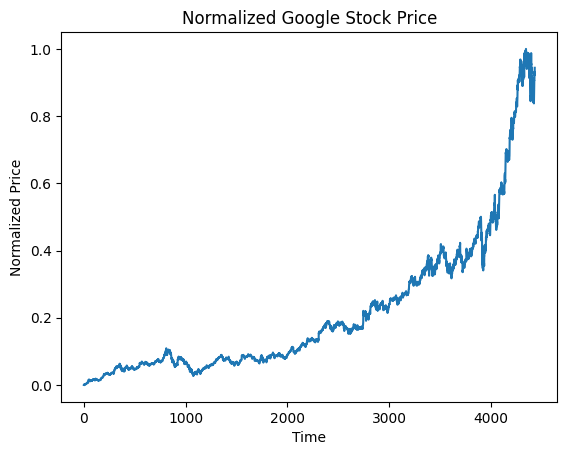

In [13]:

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

plt.plot(scaled_data)
plt.title("Normalized Google Stock Price")
plt.xlabel("Time")
plt.ylabel("Normalized Price")
plt.show()

In [14]:
def create_sequences(data, time_step=30):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

In [15]:
time_step = 60  

X, y = create_sequences(scaled_data, time_step)

X = X.reshape(X.shape[0], X.shape[1], 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [16]:

model = Sequential()

model.add(SimpleRNN(units=40, return_sequences=False, input_shape=(X_train.shape[1], 1)))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

C:\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0032 - val_loss: 0.0056
Epoch 2/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.3903e-05 - val_loss: 0.0059
Epoch 3/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.2356e-05 - val_loss: 0.0053
Epoch 4/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.9734e-05 - val_loss: 0.0058
Epoch 5/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.8477e-05 - val_loss: 0.0056
Epoch 6/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.1066e-05 - val_loss: 0.0051
Epoch 7/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.0718e-05 - val_loss: 0.0038
Epoch 8/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.6590e-05 - val_loss: 0.0042
Epoch 9/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.5517e-05 - val_loss: 0.0038
Epoch 10/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 1.6065e-05 - val_loss: 0.0030


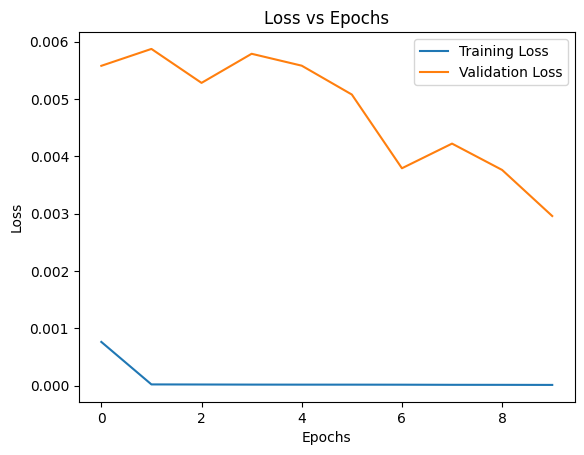

In [17]:

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


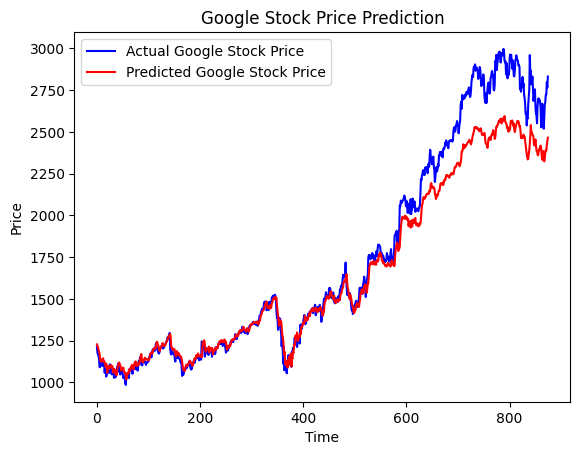

In [18]:
predicted_prices = model.predict(X_test)


predicted_prices = scaler.inverse_transform(predicted_prices)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.plot(y_test_actual, color='blue', label='Actual Google Stock Price')
plt.plot(predicted_prices, color='red', label='Predicted Google Stock Price')
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()